# hyperparameter tuning: brute force search

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor

# generate toy dataset:
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.normal(size=len(x))
X = x[:, np.newaxis]

In [3]:
cv = KFold(shuffle=True)

C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [4]:
# for each parameter setting do cross-validation:
for n_neighbors in [1, 3, 5, 10, 20]:
    scores = cross_val_score(KNeighborsRegressor(n_neighbors=n_neighbors), X, y, cv=cv)
    print("n_neighbors: %d, average score: %f" % (n_neighbors, np.mean(scores)))

n_neighbors: 1, average score: 0.596369
n_neighbors: 3, average score: 0.704946
n_neighbors: 5, average score: 0.745447
n_neighbors: 10, average score: 0.720303
n_neighbors: 20, average score: 0.613621


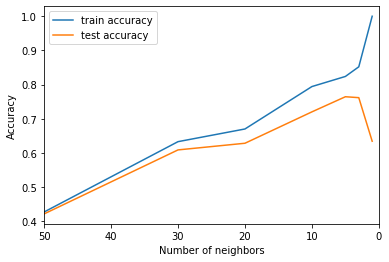

In [5]:
from sklearn.model_selection import validation_curve

# plots one parameter (e.g. n_neighbors), against training and validation error


n_neighbors = [1, 3, 5, 10, 20, 30, 50]
train_scores, test_scores = validation_curve(KNeighborsRegressor(), X, y, param_name="n_neighbors",
                                             param_range=n_neighbors, cv=cv)
plt.plot(n_neighbors, train_scores.mean(axis=1), label="train accuracy")
plt.plot(n_neighbors, test_scores.mean(axis=1), label="test accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.xlim([50, 0])
plt.legend(loc="best");

<div class="alert alert-warning">
    NB: many neighbors mean a "smooth" or "simple" model, so the plot uses a reverted x axis.
</div>